### Baseline

First, I wanted to see what the most basic baselines were. Using simple non-DL approaches, and not tailored to faces, then we can see how the DL and more advanced non-DL improve.

Inspirations: https://stackoverflow.com/questions/44752240/how-to-remove-shadow-from-scanned-images-using-opencv and https://stackoverflow.com/questions/63179977/opencv-how-to-normalize-face-remove-shadow

In [1]:
import cv2
import numpy as np
from skimage import measure
from matplotlib import pyplot as plt
import os
from typing import Tuple, List

In [4]:
validation_paths = [
    "../images/9156-004.png",
    "../images/9162-031.png",
    "../images/9165-009.png",
    "../images/9169-020.png"
]

images = [(plt.imread(path) * 255).astype(np.uint8) for path in validation_paths]

images_grey = [cv2.imread(path, cv2.IMREAD_GRAYSCALE).astype(np.uint8) for path in validation_paths]

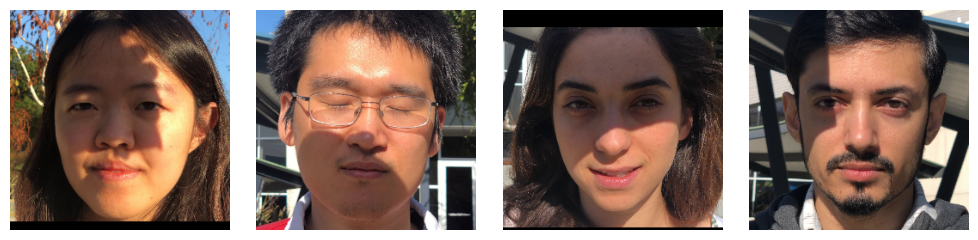

In [5]:
def display_images_grey(images, save_name=None):
    # display images as a row of subfigures
    plt.figure(figsize=(2.5 * len(images), 2.5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap = plt.cm.gray)
        plt.axis('off')
    plt.tight_layout()
    if save_name is not None:
        plt.savefig(os.path.join("figures", save_name + ".png"))

def display_images(images, save_name=None):
    # display images as a row of subfigures
    plt.figure(figsize=(2.5 * len(images), 2.5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap = plt.cm.gray)
        plt.axis('off')
    plt.tight_layout()
    if save_name is not None:
        plt.savefig(os.path.join("figures", save_name + ".png"))

display_images(images)

In [6]:
def baseline_shadow(images):

  resulting_images = []

  for img in images:
    rgb_planes = cv2.split(img)
    result_norm_planes = []

    for plane in rgb_planes:
      dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
      bg_img = cv2.medianBlur(dilated_img, 21)
      diff_img = 255 - cv2.absdiff(plane, bg_img)
      norm_img = cv2.normalize(diff_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
      result_norm_planes.append(norm_img)

    result_norm = cv2.merge(result_norm_planes)

    resulting_images.append(result_norm)

  return resulting_images

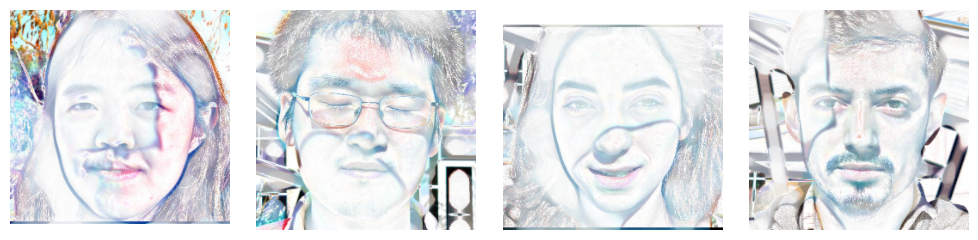

In [7]:
display_images(baseline_shadow(images))

Work any better with greyscale?

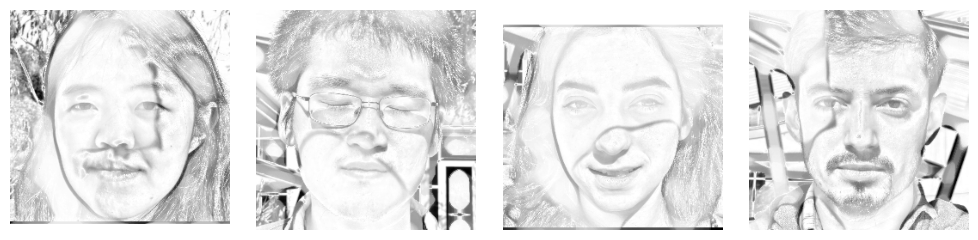

In [8]:
display_images_grey(baseline_shadow(images_grey))

Clearly not working well with faces. The pitfall is the differencing. This technique works well with things like scanned papers.

Next method is not so much attemtimg to "remove" the shadow, but to minimize its appearance.

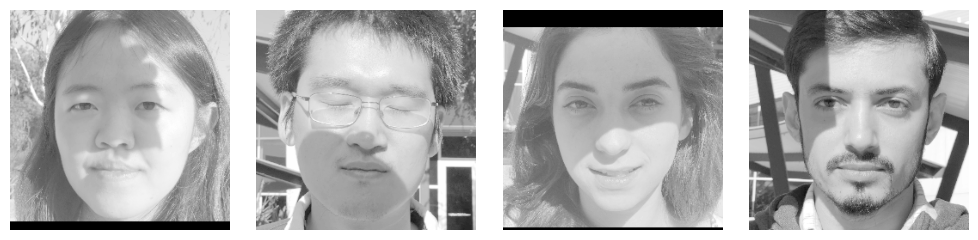

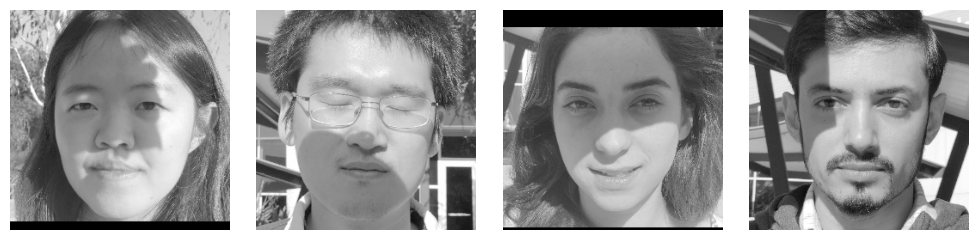

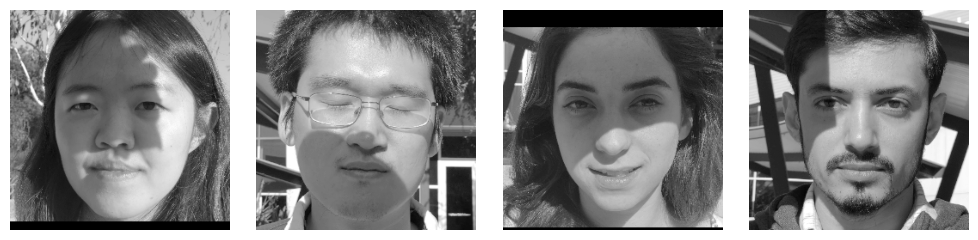

In [15]:
def gamma_method(img, gamma = 0.5):

    #gamma = 0.5
    res = np.power((img / 255.0), gamma) * 255
    res = np.clip(res, 0, 255).astype(np.uint8)
    return res

    # img_res = np.hstack([img, res])

    # return img_res

for gamma in [0.3, 0.5, 0.7]:
  results = []
  for img in images_grey:
    results.append(gamma_method(img, gamma = gamma))
  display_images_grey(results)

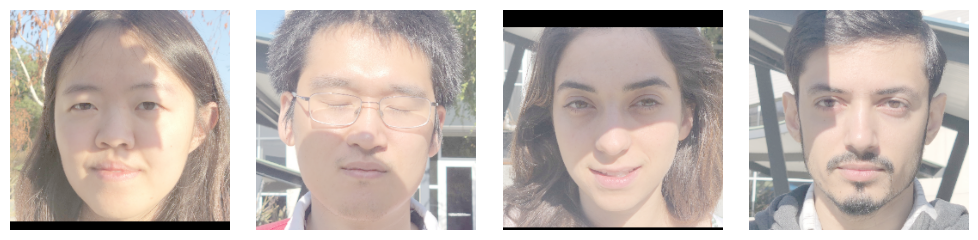

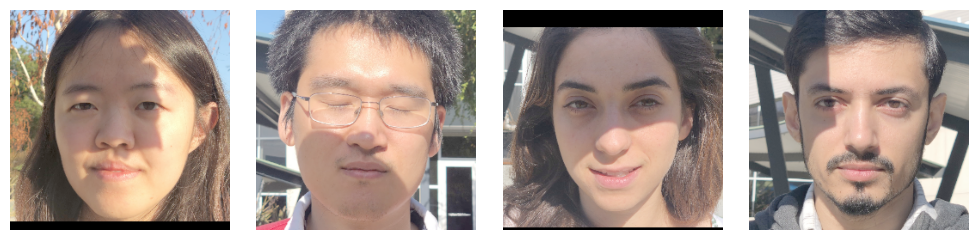

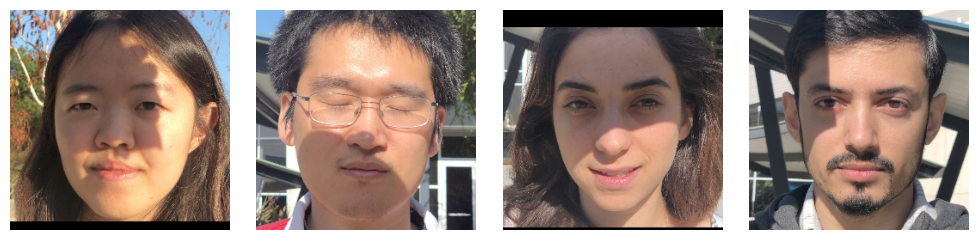

In [16]:
for gamma in [0.3, 0.5, 0.7]:
  results = []
  for img in images:
    results.append(gamma_method(img, gamma = gamma))
  display_images(results)

In [17]:
import glob
for path in glob.glob("../images/*.png"):
    print(path)
    img = cv2.imread(path)
    img = gamma_method(img, gamma = 0.5)
    outpath = "results/" + path.split("/")[-1]
    cv2.imwrite(outpath, img)

../images/9176-008.png
../images/9181-041.png
../images/9175-055.png
../images/9176-009.png
../images/9167-026.png
../images/9166-037.png
../images/9162-003.png
../images/9175-095.png
../images/9177-008.png
../images/9158-009.png
../images/9190-055.png
../images/9166-030.png
../images/9189-057.png
../images/9156-004.png
../images/9179-011.png
../images/9169-005.png
../images/9179-004.png
../images/9170-013.png
../images/9170-007.png
../images/9156-005.png
../images/9167-092.png
../images/9181-009.png
../images/9181-035.png
../images/9179-007.png
../images/9165-021.png
../images/9165-009.png
../images/9170-004.png
../images/9156-012.png
../images/9176-079.png
../images/9178-006.png
../images/9175-019.png
../images/9180-008.png
../images/9179-002.png
../images/9170-015.png
../images/9167-069.png
../images/9157-006.png
../images/9170-003.png
../images/9156-015.png
../images/9178-011.png
../images/9169-000.png
../images/9179-001.png
../images/9178-010.png
../images/9171-007.png
../images/9